# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

Para hacer una prediccion del precio de una propiedad creo que es necesario saber la mayor cantidad de atributos posibles sobre las propiedades existentes: 

Cantidad de ambientes, m2 cubiertos y descubiertos, ubicacion geografica, antiguedad de la propiedad, estado de las intalaciones, amenities, servicios cercanos a la propiedad, valor del tipo de cambio al momento de la cotizacion. 

Conociendo estos datos es posible que se pueda armar un modelo para predecir el precio de venta de futuras propiedades.




---

<br />
<br />

# RESPONDER SECCIÓN 1 ANTES DE CONTINUAR
<br />
<br />

---

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



0. Importa las librerías necesarias para trabajar en la consigna.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from funpymodeling.exploratory import profiling_num
from funpymodeling.exploratory import freq_tbl

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [2]:
data = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
data.shape
#data.head()

(146660, 19)

2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [3]:
print(data.columns)

print(data.isna().sum())

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')
start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64


3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

Hay 10 tipos de propiedades y son las siguientes: ['Departamento' 'PH' 'Casa' 'Lote' 'Casa de campo' 'Oficina' 'Otro'
 'Local comercial' 'Cochera' 'Depósito']


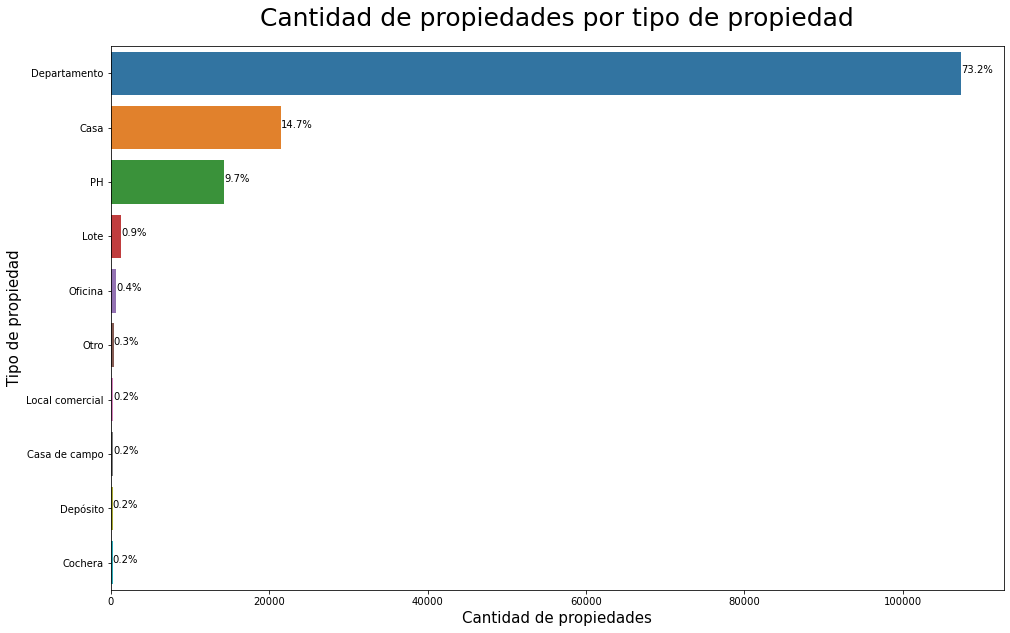

In [4]:
print("Hay", len(data['property_type'].unique()), "tipos de propiedades y son las siguientes:" ,data['property_type'].unique())

plt.figure(figsize = (16,10))
plt.title('Cantidad de propiedades por tipo de propiedad', size = 25, weight=400, pad=20, loc = 'center')
ax = sns.countplot(data = data, y = "property_type", order = data['property_type'].value_counts().index)
plt.ylabel('Tipo de propiedad', size=15)
plt.xlabel('Cantidad de propiedades', size=15)

total = len(data['property_type'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()




4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

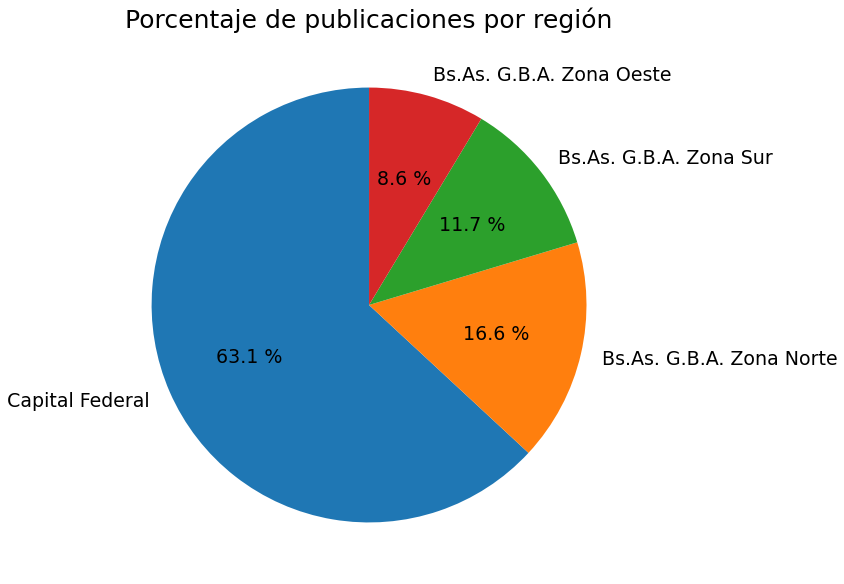

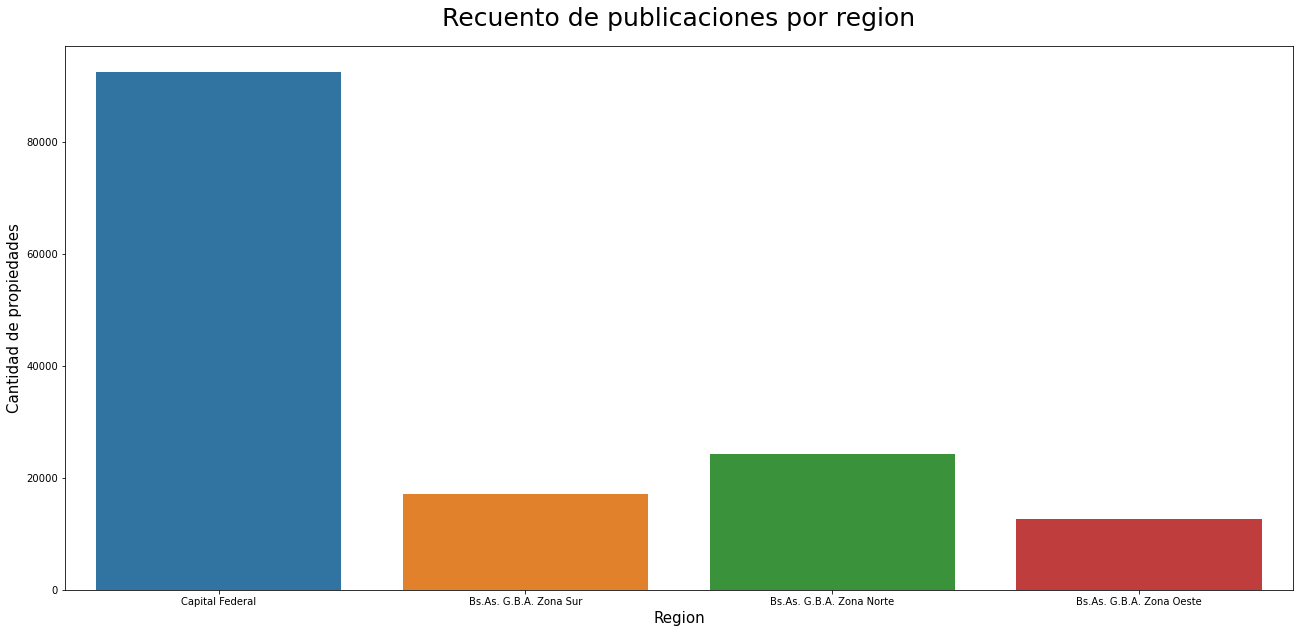

Text(0, 0.5, 'Cantidad de propiedades')

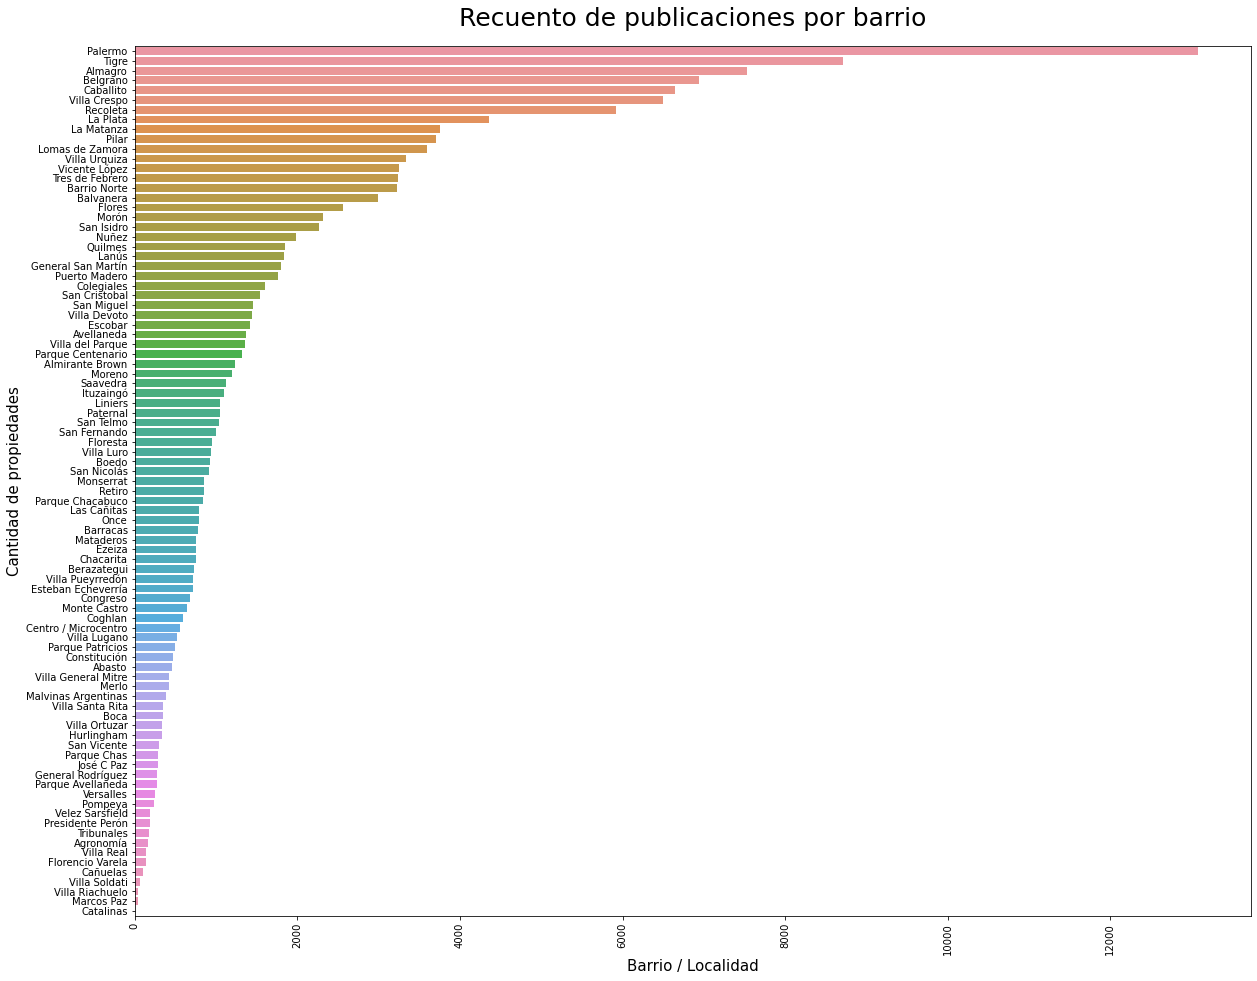

In [5]:
#data.groupby(['l2']).size()
#data.groupby(['l3']).size()

fig = plt.figure(figsize = (22,10))
text_dict = {'fontsize' : 19, 'color': 'black'}
plt.pie(data.l2.value_counts(), labels = data.l2.value_counts().index, autopct="%0.1f %%", textprops = text_dict, startangle = 90)
fig.set_facecolor('white')
plt.title('Porcentaje de publicaciones por región', size = 25, weight=400, loc = 'center')
plt.show()


plt.figure(figsize = (22,10))
plt.title('Recuento de publicaciones por region', size = 25, weight=400, pad=20, loc = 'center')
sns.countplot(data = data, x = "l2")
plt.xlabel('Region', size= 15)
plt.ylabel('Cantidad de propiedades', size= 15)
plt.show()

plt.figure(figsize = (20,16))
plt.title('Recuento de publicaciones por barrio', size = 25, weight=400, pad=20, loc = 'center')
sns.countplot(data = data, y = "l3",  order = data['l3'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Barrio / Localidad', size= 15)
plt.ylabel('Cantidad de propiedades', size= 15)

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [6]:
data1 = data[data.property_type.isin(['Departamento', 'PH', 'Casa']) & (data.l2=='Capital Federal')]
print(data1.columns)
print(data1.shape)

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')
(91485, 19)


**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

In [7]:
#Estadisticos del dataframe
#Establezco los percentiles que quiero analizar
per= [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
data1.describe(percentiles = per)



,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,86951.000000,86937.000000,91485.000000,91485.000000,89314.000000,82568.000000,82250.000000,9.148500e+04
mean,-34.599081,-58.436002,2.964278,1.960278,1.560147,112.626369,94.966310,2.595003e+05
std,0.023957,0.036297,1.314704,1.072946,0.860309,980.713664,778.515243,3.222654e+05
min,-34.696419,-58.530468,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
5%,-34.638717,-58.502715,1.000000,1.000000,1.000000,34.000000,32.000000,7.877120e+04
10%,-34.628848,-58.487749,2.000000,1.000000,1.000000,39.000000,36.000000,9.000000e+04
25%,-34.613757,-58.459605,2.000000,1.000000,1.000000,49.000000,44.000000,1.200000e+05
50%,-34.599446,-58.433789,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,-34.584148,-58.410143,4.000000,3.000000,2.000000,111.000000,96.000000,2.790000e+05
90%,-34.566170,-58.389330,4.000000,3.000000,3.000000,180.000000,151.000000,4.600000e+05


In [8]:
data1.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta


In [9]:
#Elimino las columans start_date, end_date, created_on, lat, lon, l1, l2, currency y operation_type.
data1.drop(['lon','lat', 'start_date','end_date','created_on','l1', 'currency', 'operation_type', 'l2'],1, inplace = True)
data1.head()
data1.describe(percentiles=per)

/Users/rubengaviriamejia/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,91485.000000,91485.000000,89314.000000,82568.000000,82250.000000,9.148500e+04
mean,2.964278,1.960278,1.560147,112.626369,94.966310,2.595003e+05
std,1.314704,1.072946,0.860309,980.713664,778.515243,3.222654e+05
min,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
5%,1.000000,1.000000,1.000000,34.000000,32.000000,7.877120e+04
10%,2.000000,1.000000,1.000000,39.000000,36.000000,9.000000e+04
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.200000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,4.000000,3.000000,2.000000,111.000000,96.000000,2.790000e+05
90%,4.000000,3.000000,3.000000,180.000000,151.000000,4.600000e+05


1. Los valores maximos de algunas columnas estan muy alejados de la media, por lo que deben ser outliers, los cuales deben ser descartados.
2. Viendo los valores minimos de algunas columnas (0 en 'bedrooms', 10 en 'surface_total' o 1 en 'surface_covered') podemos notar que son errores.
3. El 99% de las propiedades tienen 5 habitaciones o menos.
4. El 95% de las propiedades tienen 5 ambientes o menos.
5. El 99% de las propiedades tienen 5 baños o menos.
6. El 95% de las propiedades tienen un precio menor o igual a USD$695.000.-
7. El 95% de las propiedades tienen una superficie menor o igual a 250m2

Text(0.5, 0, 'Precio')

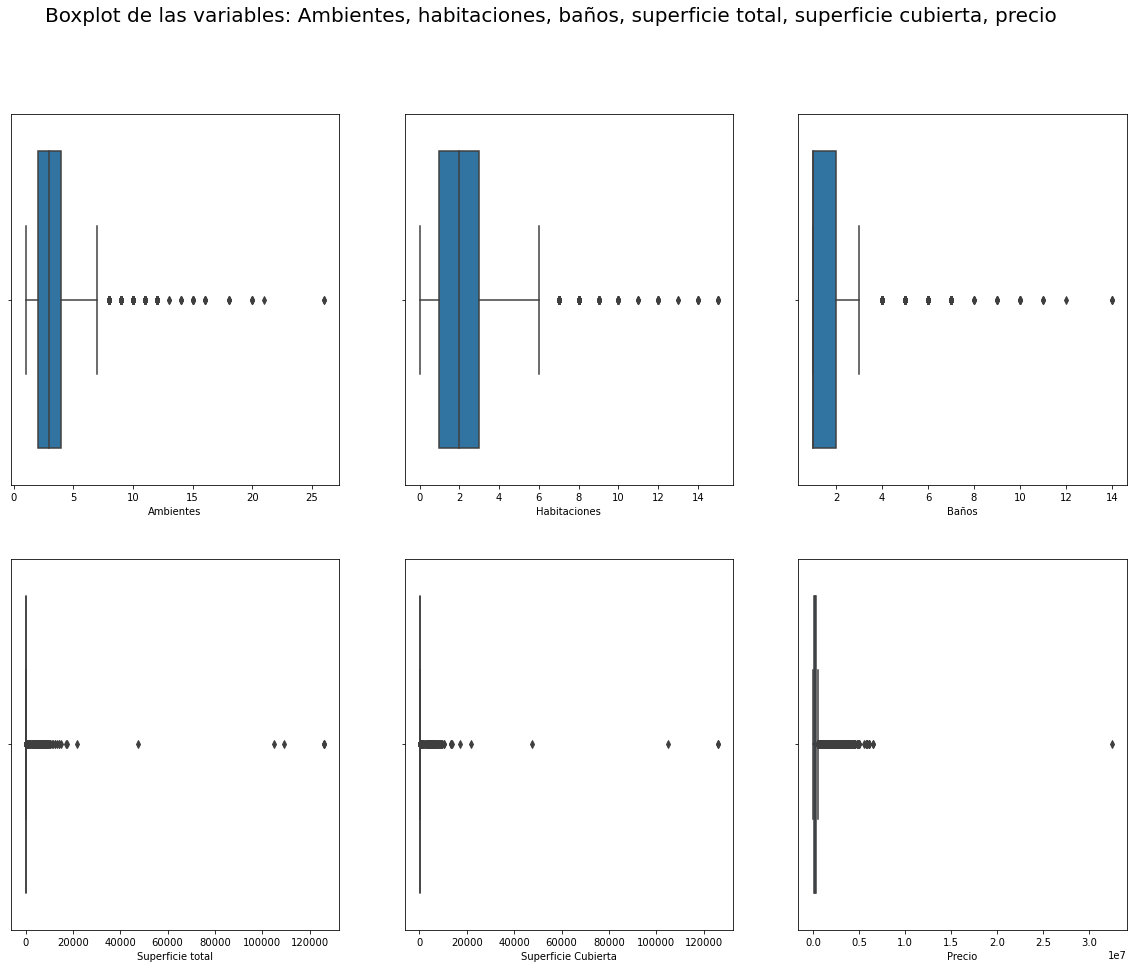

In [10]:
plt.figure(figsize= (20,15))
plt.suptitle("Boxplot de las variables: Ambientes, habitaciones, baños, superficie total, superficie cubierta, precio", weight=20, size = 20)

plt.subplot(2,3,1)
sns.boxplot(data1.rooms)
plt.xlabel('Ambientes')

plt.subplot(2,3,2)
sns.boxplot(data1.bedrooms)
plt.xlabel('Habitaciones')

plt.subplot(2,3,3)
sns.boxplot(data1.bathrooms)
plt.xlabel('Baños')

plt.subplot(2,3,4)
sns.boxplot(data1.surface_total)
plt.xlabel('Superficie total')

plt.subplot(2,3,5)
sns.boxplot(data1.surface_covered)
plt.xlabel('Superficie Cubierta')

plt.subplot(2,3,6)
sns.boxplot(data1.price)
plt.xlabel('Precio')

Se observa lo planteado luego de analizar los estadisticos. Existen outliers en la mayoria de las variables por lo que decido filtrar por los valores expuestos arriba: eliminare propiedades con superficie mayor a 250m2, con precio superior a $695.000.- y con 6 o mas ambientes, habitaciones y baños.

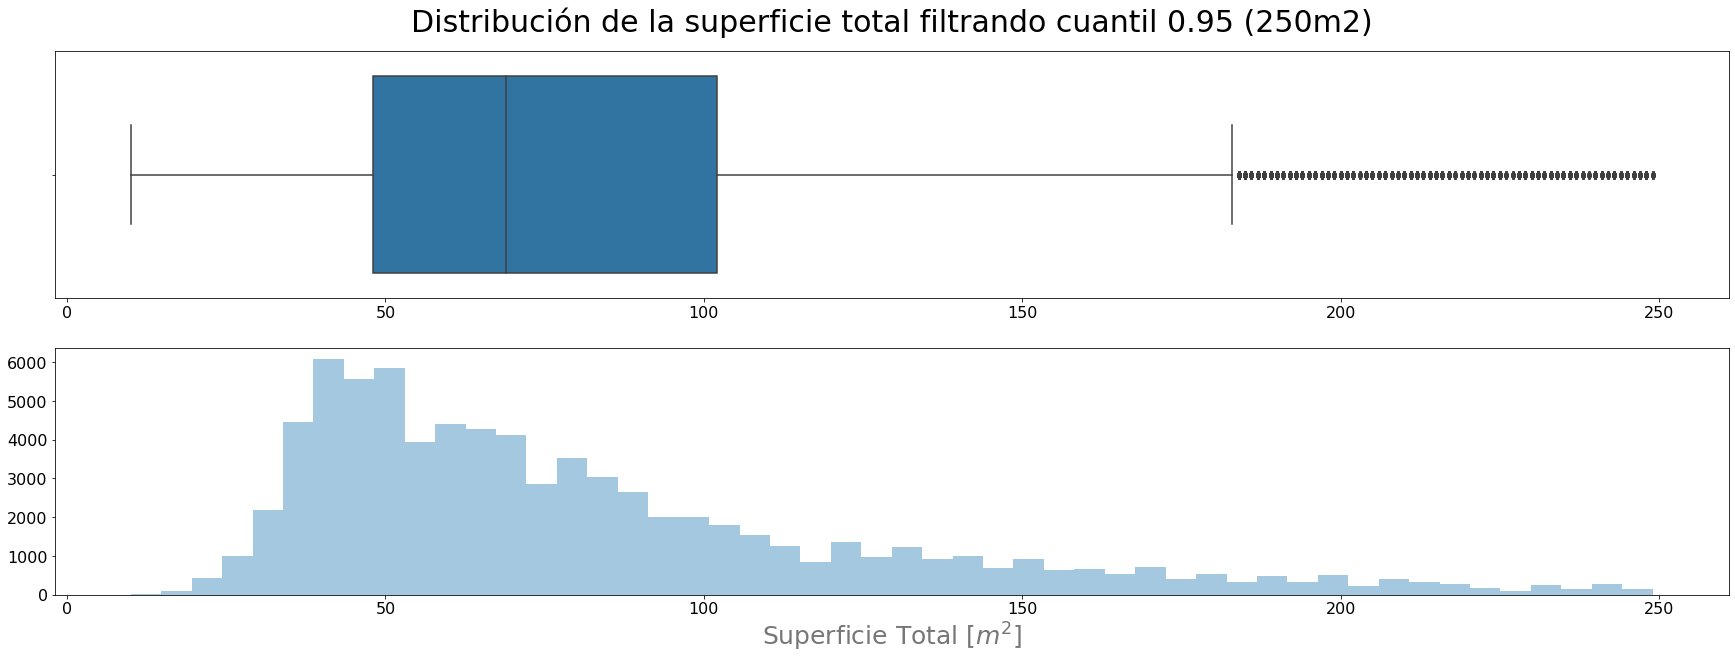

In [11]:
mask_q = data1['surface_total'] < data1['surface_total'].quantile(0.95)


plt.figure(figsize = (30,10))
plt.subplot(2,1,1)
sns.boxplot(data1['surface_total'][mask_q])
plt.xticks(fontsize=16 )
plt.xlabel("")
plt.title('Distribución de la superficie total filtrando cuantil 0.95 (250m2)', weight=20, size = 30, pad = 20)
#ax.tick_params(axis="x", labelsize=15)
plt.subplot(2,1,2)
sns.distplot(data1['surface_total'][mask_q], kde = False)
plt.xlabel('Superficie Total [$m^{2}$]', size = 25, color='#777777')
plt.xticks(fontsize=16 )
plt.yticks(fontsize=16 )


plt.show()

Luego de eliminar las propiedades con superficie mayor a 250m (cuantil 0.95), se observa una distribucion normal con una leve asimetria positiva (hacia la derecha), ubicandose la mayor cantidad de propiedades entre los 45m2 y los 100m2.

In [12]:
data1 = data1[mask_q]

In [13]:
data1.shape

(78437, 10)

In [14]:
data1.nsmallest(5, ['surface_total'])

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type
73182,Villa Lugano,2.0,1.0,1.0,10.0,45.0,220000.0,Venta PH en Villa Lugano Capital Federal Piedr...,"PH en Venta, Ph de 2 ambientes al frente con l...",PH
132438,Belgrano,3.0,2.0,1.0,10.0,78.0,160000.0,Venta Belgrano 3-4 ambientes planta baja 87 me...,Corredor Responsable: Rebeca Stern - C.U.C.I.C...,Departamento
48635,Palermo,3.0,1.0,1.0,11.0,60.0,158000.0,Luminoso PH 3 ambientes en Palermo Soho,Corredor Responsable: Flavia Aguirre - CUCICBA...,PH
57085,Parque Chacabuco,2.0,1.0,1.0,11.0,73.0,161900.0,Venta 2 amb estrenar cochera ameneties P.Chaca...,Corredor Responsable: Hernan Perrone - C.U.C.I...,Departamento
89351,Barrio Norte,4.0,3.0,2.0,11.0,125.0,476000.0,Venta depto 4 ambIentes SEMIPISO B.NORTE,Corredor Responsable: Jorge Salafia - CUCICBA ...,Departamento


Hay valores de 'surface_covered' superiores a 'surface_total', los cuales no tienen sentido, por lo que seran eliminados.

In [15]:
mask_surface = data1['surface_covered'] <= data1['surface_total']
data1 = data1[mask_surface]

In [16]:
data1.shape

(77223, 10)

Elimino valores con superficie total menor a 20m2

In [17]:
mask_st = data1.surface_total >= 20
data1 = data1[mask_st]
data1.shape

(77149, 10)

Elimino valores con precio mayores a USD$650.000.-

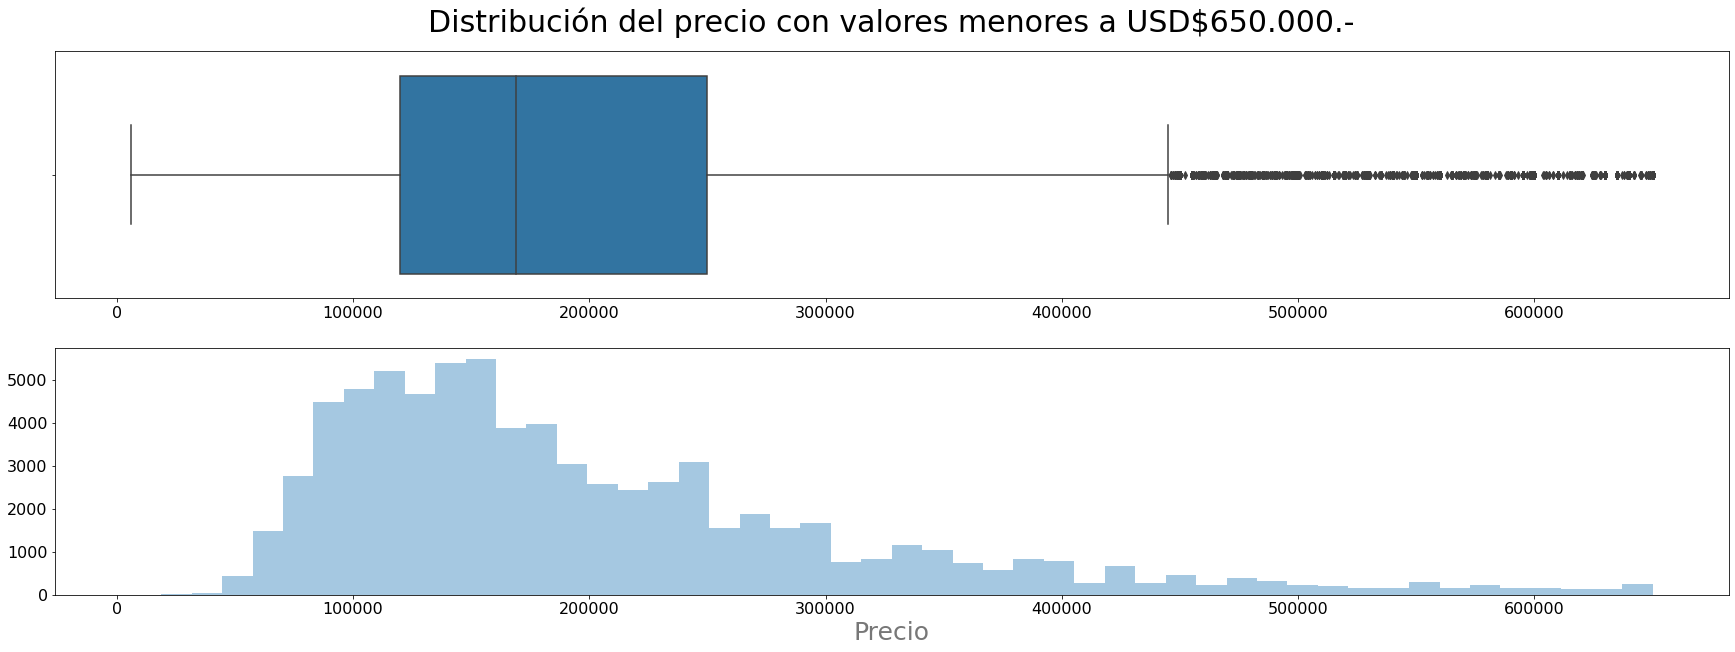

In [18]:
mask_p = data1.price <= 650000
data1 = data1[mask_p]
data1.shape

plt.figure(figsize = (30,10))

plt.subplot(2,1,1)
sns.boxplot(data1['price'])
plt.xlabel("")
plt.xticks(fontsize=16 )
plt.title('Distribución del precio con valores menores a USD$650.000.-', weight=20, size = 30, pad = 20)
#ax.tick_params(axis="x", labelsize=15)
plt.subplot(2,1,2)
sns.distplot(data1['price'], kde = False)
plt.xlabel('Precio', size = 25, color='#777777')
plt.xticks(fontsize=16 )
plt.yticks(fontsize=16 )

plt.show()

Luego de eliminar las propiedades con precios superiores a USD650.000.- (cuantil 0.95), se observa observa una distribucion normal con una leve asimetria hacia la derecha (asimetria positiva), ubicandose la mayor cantidad de propiedades con precios entre USD120.000.- y USD250.000.-

Elimino las propiedades con 6 o mas habitaciones, con 6 o mas ambientes y con mas de 6 baños.

In [19]:
data1 = data1[(data1.bathrooms <= 5) & (data1.bedrooms <= 5) & (data1.rooms <= 5)]

<Figure size 2880x936 with 0 Axes>

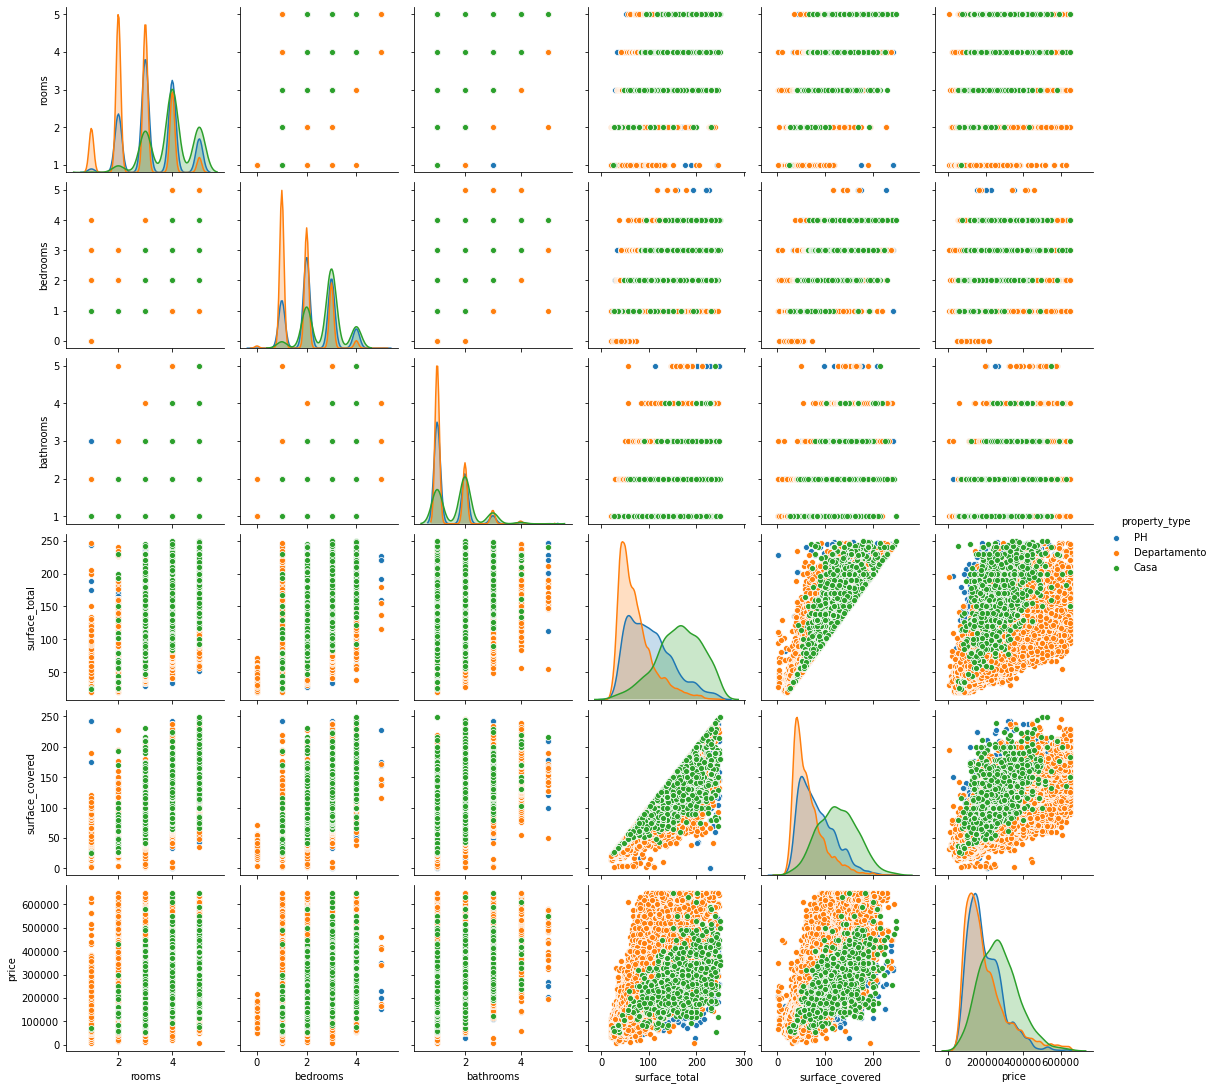

In [20]:
plt.figure(figsize = (40,13))
sns.pairplot(data = data1, hue = 'property_type')
plt.show()

Del pairplot podemos destacar que las mejores variables para predecir el precio son la superficie cubierta y la superficie total, tal como se demostrara en la tabla y el heatmap de correlaciones.

7. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

In [21]:
data1.corr()


,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.939378,0.547821,0.745606,0.788798,0.580240
bedrooms,0.939378,1.000000,0.557140,0.734279,0.781943,0.564706
bathrooms,0.547821,0.557140,1.000000,0.614087,0.653725,0.644520
surface_total,0.745606,0.734279,0.614087,1.000000,0.923006,0.734660
surface_covered,0.788798,0.781943,0.653725,0.923006,1.000000,0.765693
price,0.580240,0.564706,0.644520,0.734660,0.765693,1.000000


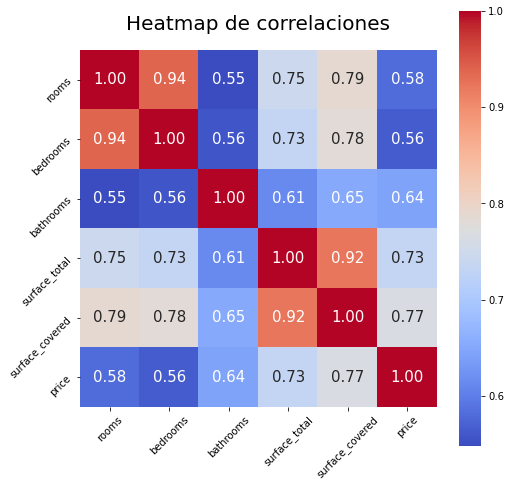

In [22]:
corr = data1.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title("Heatmap de correlaciones", size=20, pad=20)
plt.show()

A partir de analizar la tabla de correlaciones, se puede inferir que las mejores variables
para predecir el precio de una propiedad son la superficie total y la superficie cubierta. Si puedieramos incorporar el barrio al cual pertenece cada propiedad, seria un buen predictor debido a que hay barrios que poseen un precio del m2 mucho mayor a otros. 

Text(0.5, 0, 'Superficie cubierta')

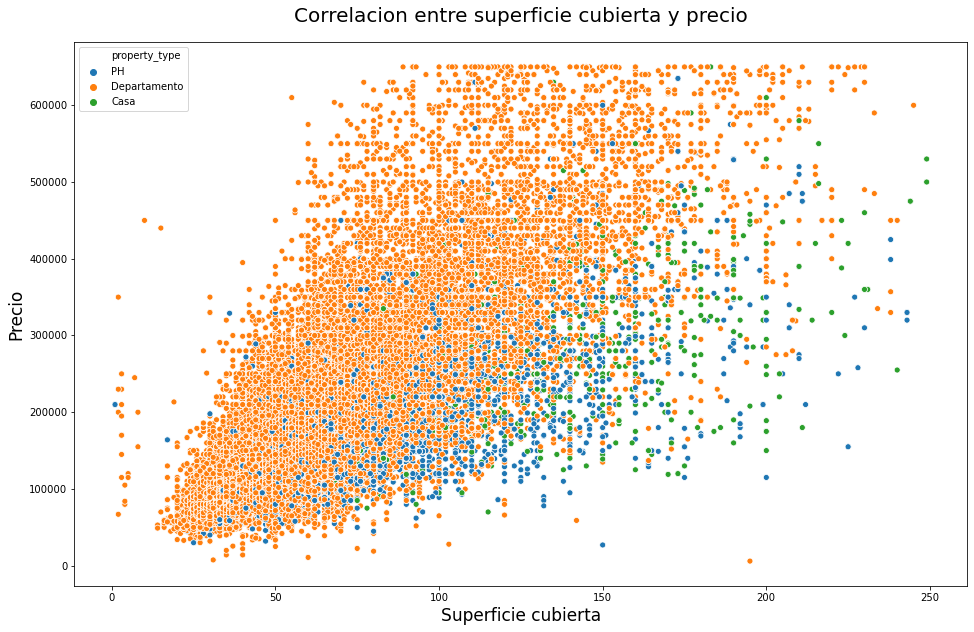

In [23]:
plt.figure(figsize=(16,10))
plt.title("Correlacion entre superficie cubierta y precio", size=20, pad=20)
sns.scatterplot(x="surface_covered", y="price", hue="property_type" , data=data1)
plt.ylabel('Precio', fontsize=17)
plt.xlabel('Superficie cubierta', fontsize=17)

Analizando el grafico de correlacion entre superficie cubierta y precio, vemos que a medida que la superficie cubierta aumenta, tambien aumenta el precio de las propiedades. Sin embargo, esto se hace mas evidente en departamentos que en casas y PHs:
Observando los departamentos, hay algunos que aun sin poseer mucha superficie cubierta poseen precios muy altos. Esto se debe probablemente a que esten en barrios en los cuales el precio del m2 sea muy elevado.

### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.


Me propongo averiguar en que barrios se encuentran los departamentos mas caros de Buenos Aires y que caracteristicas (ambientes, m2) poseen.

In [24]:
#Selecciono propiedades en Capital Federal y que sean departamentos
data6 = data[(data.property_type=='Departamento') & (data.l2=='Capital Federal')]



#Analizo la distribucion del precio de los departamentos con percentiles
print(data6['price'].describe(percentiles = per))
print(data6['surface_covered'].describe(percentiles = per))


count    7.902900e+04
mean     2.597756e+05
std      3.389683e+05
min      6.000000e+03
5%       7.700000e+04
10%      8.900000e+04
25%      1.190000e+05
50%      1.700000e+05
75%      2.690000e+05
90%      4.650000e+05
95%      7.300000e+05
99%      1.650000e+06
max      3.243423e+07
Name: price, dtype: float64
count     70315.000000
mean         86.041357
std         497.058462
min           1.000000
5%           31.000000
10%          35.000000
25%          43.000000
50%          60.000000
75%          87.000000
90%         137.000000
95%         185.000000
99%         323.000000
max      104890.000000
Name: surface_covered, dtype: float64


El 90% de los departamentos valen menos de USD$465.000.-

Analizaremos los departamentos por encima de ese precio.



               lat          lon        rooms     bedrooms    bathrooms  \
count  6454.000000  6454.000000  7366.000000  7366.000000  7325.000000   
mean    -34.585856   -58.409489     4.425604     3.010182     2.944437   
std       0.019267     0.032954     1.380729     0.887588     1.039261   
min     -34.688740   -58.522403     1.000000     1.000000     1.000000   
5%      -34.619165   -58.460669     3.000000     2.000000     2.000000   
10%     -34.613261   -58.452205     3.000000     2.000000     2.000000   
25%     -34.595508   -58.437641     4.000000     3.000000     2.000000   
50%     -34.585814   -58.406064     4.000000     3.000000     3.000000   
75%     -34.572411   -58.385209     5.000000     3.000000     4.000000   
90%     -34.562450   -58.362180     6.000000     4.000000     4.000000   
95%     -34.558315   -58.361287     7.000000     4.000000     5.000000   
99%     -34.542995   -58.360158     9.000000     5.000000     6.000000   
max     -34.538377   -58.354919    15.

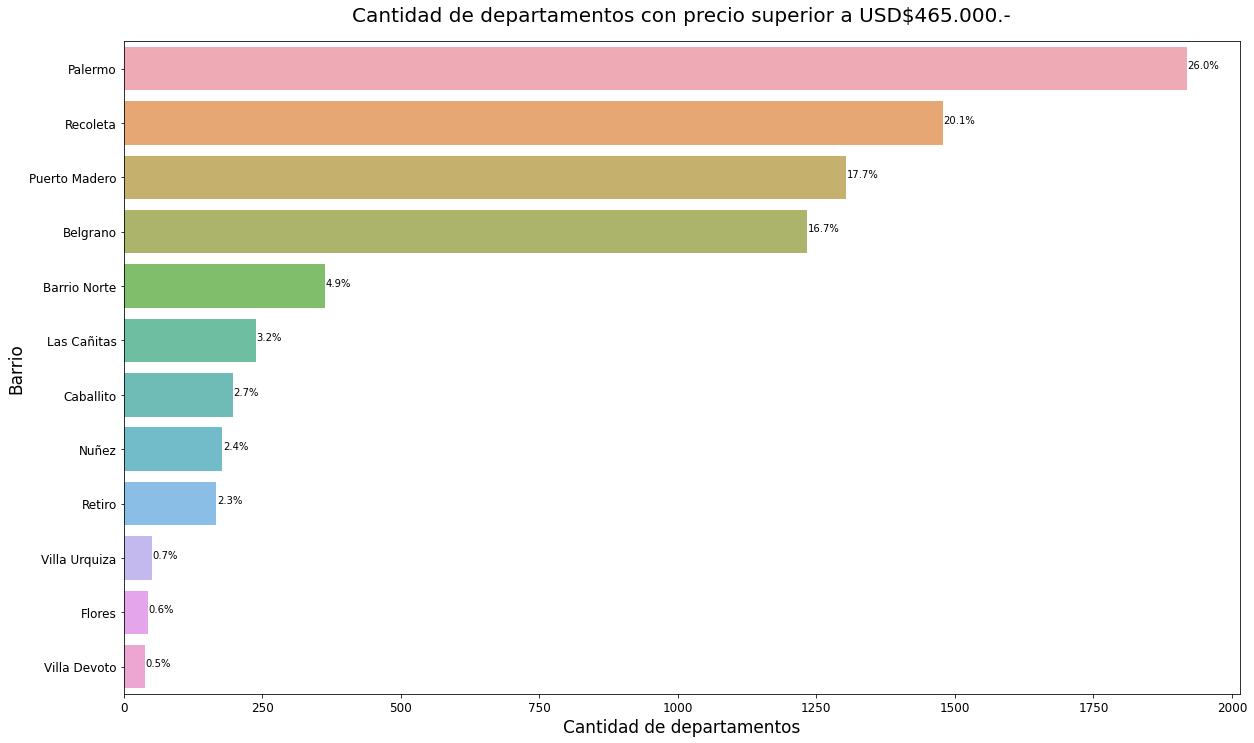

ValueError: Could not interpret input 'lat'

In [25]:
highest_price2 = data6[(data6.price > 465000) & (data6.surface_covered < 800) & (data6.surface_total < 800) & (data6.surface_total > 15) & (data6.surface_covered > 15) ]
print(highest_price2.describe(percentiles = per))


barrio_count  = highest_price2['l3'].value_counts()
barrio_count = barrio_count[:12,]
plt.figure(figsize=(20,12))
ax = sns.barplot( barrio_count.values, barrio_count.index, alpha=0.8)
plt.title("Cantidad de departamentos con precio superior a USD$465.000.-", size=20, pad=20)
plt.ylabel('Barrio', fontsize=17)
plt.xlabel('Cantidad de departamentos', fontsize=17)
plt.xticks(fontsize=12 )
plt.yticks(fontsize=12 )

total = len(highest_price2['l3'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x = p.get_x() + p.get_width() + 1
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, (x, y))
plt.show()


sns.scatterplot(x="lat", y="lon", hue="" , data=data1)

In [ ]:
plt.figure(figsize = (30,10))
plt.title('Distribución de la superficie en departamentos cuyo precio es mayor a USD$465.000.-', weight=20, size = 30, pad = 20)
sns.distplot(highest_price2['surface_total'], kde=False)
plt.xlabel('Superficie total en m2', size = 25)
plt.xticks(fontsize=16 )
plt.yticks(fontsize=16 )

plt.show()

Analizando los datos ya filtrados se observa que del total de departamentos cuyo precio es superior a USD$465.000.- al menos la mitad tiene mas de 185m2, siendo el promedio 211m2. La mayoria tiene al menos 4 ambientes (con, por lo menos, 3 habitaciones y 3 baños). 

La mayoria se encuentran en los barrios de la zona norte de la Ciudad de Buenos Aires.

Se encuentran distribuidos de la siguiente manera: 26% en Palermo, 20.1% en Recoleta, 17.7% en Puerto Madero, 16,7% en Belgrano, 4,9% en Barrio Norte y 3,2% en Las Cañitas. El restante 11.4% se encuentra en el resto de los barrios de Capital Federal.


### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

In [26]:
#Cargo el Dataset
data3 = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')

#Selecciono propiedes en CABA y tipo: Departamento, PH o Casa
data3 = data3[data.property_type.isin(['Departamento', 'PH', 'Casa']) & (data.l2=='Capital Federal')]

#Selecciono propiedades con sup total menor a 1000m2 y mayor a 15m2
data3 = data3[(data3.surface_total <= 1000) & (data3.surface_total >= 15)]

#Selecciono propiedades con precio menor a USD$400.000.-
data3 = data3[data3.price <= 400000]

#Selecciono columnas rooms, bedrooms, bathrooms, surface_total, surface_covered y price
data3 = data3[['rooms','bedrooms','bathrooms', 'surface_total', 'surface_covered', 'price']]

#Elimino instancias con valores faltantes
data3 = data3.dropna()

data3.shape


(70579, 6)

In [27]:
data3.corr()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.933709,0.521440,0.686722,0.245878,0.589380
bedrooms,0.933709,1.000000,0.527487,0.675308,0.241763,0.572306
bathrooms,0.521440,0.527487,1.000000,0.506300,0.179930,0.582780
surface_total,0.686722,0.675308,0.506300,1.000000,0.290878,0.619615
surface_covered,0.245878,0.241763,0.179930,0.290878,1.000000,0.216081
price,0.589380,0.572306,0.582780,0.619615,0.216081,1.000000


In [28]:
data3.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,70579.000000,70579.000000,70579.000000,70579.000000,70579.000000,70579.000000
mean,2.792176,1.841893,1.364273,77.839910,69.176370,182088.686805
std,1.119510,0.945306,0.626235,50.783681,115.539005,82354.795116
min,1.000000,0.000000,1.000000,15.000000,1.000000,6000.000000
25%,2.000000,1.000000,1.000000,47.000000,42.000000,118191.000000
50%,3.000000,2.000000,1.000000,65.000000,58.000000,165000.000000
75%,3.000000,2.000000,2.000000,91.000000,80.000000,235000.000000
max,21.000000,15.000000,14.000000,1000.000000,9626.000000,400000.000000


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [30]:
linear_model = LinearRegression()
tree_regressor = DecisionTreeRegressor(max_depth=10, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=8)


 Utilizare RMSE y R^2 como metricas para evaluar los resultados del modelo. RMSE porque el valor que expresa es directamente comparable con la variable a predecir, que en este caso es el precio, mientras que R^2 para corroborar si la variable a predecir es realmente explicada por el modelo.

### Selecciono variables predictoras (X) y variable a predecir (y)

In [31]:
X = data3[['surface_total', 'bathrooms', 'bedrooms']]
y = data3.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(52934, 3) (52934,) (17645, 3) (17645,)


### Creo un modelo de regresion lineal como benchmark

In [32]:
# Entreno el modelo
linear_model.fit(X_train, y_train)

# Predecimos sobre nuestro set
y_train_pred_lin = linear_model.predict(X_train)
y_test_pred_lin = linear_model.predict(X_test)
                                       
# Buscamos RMSE y R2
rmse_lin_train = np.sqrt(mean_squared_error(y_train, y_train_pred_lin))
rmse_lin_test = np.sqrt(mean_squared_error(y_test, y_test_pred_lin))
r2_lin_train= r2_score(y_train, y_train_pred_lin)
r2_lin_test = r2_score(y_test, y_test_pred_lin)

# Imprimo resultados
print('Modelo: Regresion lineal')
print(f'Raíz del error cuadrático medio en Train: {rmse_lin_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_lin_test}')
print(f'R2 en Train: {r2_lin_train}')
print(f'R2 en Test: {r2_lin_test}')                                       
                                     

Modelo: Regresion lineal
Raíz del error cuadrático medio en Train: 58325.45330281525
Raíz del error cuadrático medio en Test: 58798.73695575131
R2 en Train: 0.4974599056863179
R2 en Test: 0.4931278099394121


### Creo un modelo de Arbol de decision

In [33]:
# Entreno el modelo arboles de decision
tree_regressor.fit(X_train, y_train)

# Predecimos sobre nuestro set
y_train_pred_tree = tree_regressor.predict(X_train)
y_test_pred_tree = tree_regressor.predict(X_test)

# Buscamos RMSE y R2
rmse_tree_train = np.sqrt(mean_squared_error(y_train, y_train_pred_tree))
rmse_tree_test = np.sqrt(mean_squared_error(y_test, y_test_pred_tree))
r2_tree_train= r2_score(y_train, y_train_pred_tree)
r2_tree_test = r2_score(y_test, y_test_pred_tree)

# Imprimo resultados
print('Modelo: Arbol de decision')
print(f'Raíz del error cuadrático medio en Train: {rmse_tree_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_tree_test}')
print(f'R2 en Train: {r2_tree_train}')
print(f'R2 Test: {r2_tree_test}')

Modelo: Arbol de decision
Raíz del error cuadrático medio en Train: 47915.29457605199
Raíz del error cuadrático medio en Test: 49215.621547295545
R2 en Train: 0.6608414293742614
R2 Test: 0.6448854899464767


### Creo un modelo de Vecinos mas cercanos

In [34]:
# Entreno el modelo vecinos mas cercanos
knn_regressor.fit(X_train, y_train)

# Predecimos sobre nuestro set
y_train_pred_knn = knn_regressor.predict(X_train)
y_test_pred_knn = knn_regressor.predict(X_test)

# Buscamos RMSE y R2
rmse_knn_train = np.sqrt(mean_squared_error(y_train, y_train_pred_knn))
rmse_knn_test = np.sqrt(mean_squared_error(y_test, y_test_pred_knn))
r2_knn_train= r2_score(y_train, y_train_pred_knn)
r2_knn_test = r2_score(y_test, y_test_pred_knn)

# Imprimo resultados
print('Modelo: Vecinos mas cercanos')
print(f'Raíz del error cuadrático medio en Train: {rmse_knn_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_knn_test}')
print(f'R2 en Train: {r2_knn_train}')
print(f'R2 en Test: {r2_knn_test}')

Modelo: Vecinos mas cercanos
Raíz del error cuadrático medio en Train: 49605.07044569984
Raíz del error cuadrático medio en Test: 51345.11988609684
R2 en Train: 0.6364981606353863
R2 en Test: 0.6134899293659294


Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 58325.45330281525
Raíz del error cuadrático medio en Test: 58798.73695575131
R2 en Train: 0.4974599056863179
R2 en Test: 0.4931278099394121


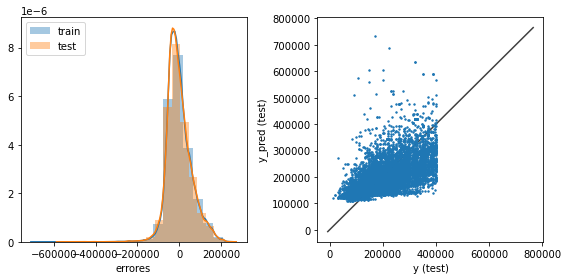

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 47915.29457605199
Raíz del error cuadrático medio en Test: 49215.621547295545
R2 en Train: 0.6608414293742614
R2 en Test: 0.6448854899464767


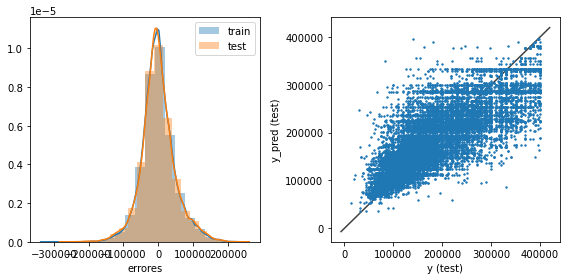

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 49605.07044569984
Raíz del error cuadrático medio en Test: 51345.11988609684
R2 en Train: 0.6364981606353863
R2 en Test: 0.6134899293659294


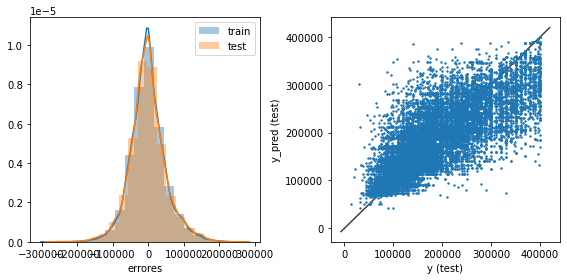

In [35]:
import seaborn as sns
modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    print(f'R2 en Train: {r2_train}')
    print(f'R2 en Test: {r2_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

### Optimizo hiperparametros para el arbol de decision

In [36]:
# Definimos las listas vacias para los valores de rmse deseados
lista_rmse_train_dt = []
lista_rmse_test_dt = []

# Definimos la lista de valores de max_depth que vamos a explorar
max_depths = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]

# Generamos un loop sobre los distintos valores de profundidad 
for max_depth in max_depths:
      # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    clf_dt = DecisionTreeRegressor(max_depth = max_depth, random_state=42)
    
    # Entrenar el modelo
    clf_dt.fit(X_train, y_train)
    
   # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred_dt = clf_dt.predict(X_train)
    rmse_dt_train = np.sqrt(mean_squared_error(y_train, y_train_pred_dt))
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred_dt = clf_dt.predict(X_test)
    rmse_dt_test = np.sqrt(mean_squared_error(y_test, y_test_pred_dt))
    
    # Agregar la información a las listas
    lista_rmse_train_dt.append(rmse_dt_train)
    lista_rmse_test_dt.append(rmse_dt_test)

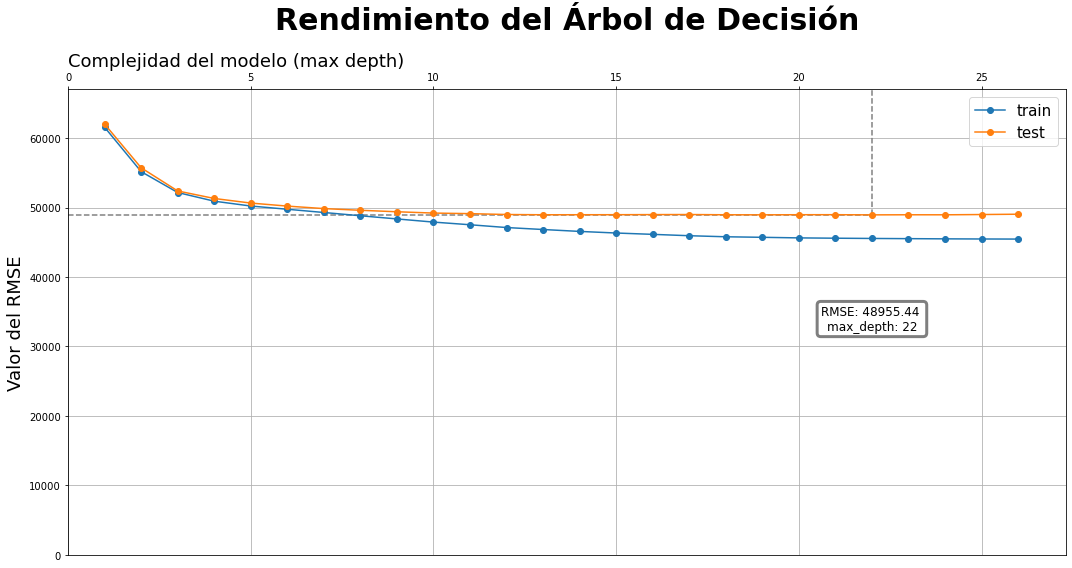

In [37]:
ind_max_depth_optimo = lista_rmse_test_dt.index(min(lista_rmse_test_dt))
max_depth_optimo = max_depths[ind_max_depth_optimo]
rmse_dt_test = lista_rmse_test_dt[ind_max_depth_optimo]
rmse_dt_train = lista_rmse_train_dt[ind_max_depth_optimo]
fig, ax = plt.subplots(figsize = (15,8))


ax.xaxis.set_ticks_position('top')
    
ax.text(0, 1.05, 'Complejidad del modelo (max depth)', transform=ax.transAxes, size=18)
plt.title('Rendimiento del Árbol de Decisión', size = 30, weight=600, pad = 60, loc = 'center')


plt.plot(max_depths, lista_rmse_train_dt,'o-',label='train' )
plt.plot(max_depths, lista_rmse_test_dt,'o-',label='test')
plt.vlines(max_depth_optimo, 
           ymin = lista_rmse_test_dt[ind_max_depth_optimo], 
           ymax = max(lista_rmse_test_dt) + 5000,
           linestyles = 'dashed', 
           colors = 'grey')
plt.hlines(lista_rmse_test_dt[ind_max_depth_optimo], 
           xmin = 0, 
           xmax = max_depth_optimo, 
           linestyles = 'dashed',
           colors = 'grey')

bbox_props1 = dict(boxstyle="round,pad=0.3", fc="white", ec="black", alpha = 0.5, lw=3)
rmse = round(lista_rmse_test_dt[ind_max_depth_optimo],2)
plt.text(max_depth_optimo, 
         rmse_dt_test-15000, 
         "RMSE: {} \nmax_depth: {}".format(rmse, max_depth_optimo), 
         ha="center", va="center", 
         size=12, 
         bbox=bbox_props1)

plt.legend(fontsize = 15)
#plt.xlabel('Complejidad del modelo [nro de vecinos]', size = 20)
plt.ylabel('Valor del RMSE', size = 18)
plt.ylim(0,max(lista_rmse_test_dt) + 5000)
plt.xlim(0)
plt.tight_layout()
plt.grid()
plt.show()

### Optimizo hiperparametros para Vecinos mas cercanos

In [38]:
# Definimos las listas vacias para los valores de rmse deseados
lista_rmse_train_knn = []
lista_rmse_test_knn = []

# Definimos la lista de valores de k_vecinos que vamos a explorar
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

# Generamos un loop sobre los distintos valores de profundidad 
for k in k_vecinos:
      # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    clf_knn = KNeighborsRegressor(n_neighbors=k)
    
    # Entrenar el modelo
    clf_knn.fit(X_train, y_train)
    
   # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred_knn = clf_knn.predict(X_train)
    rmse_knn_train = np.sqrt(mean_squared_error(y_train, y_train_pred_knn))
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred_knn = clf_knn.predict(X_test)
    rmse_knn_test = np.sqrt(mean_squared_error(y_test, y_test_pred_knn))
    
    # Agregar la información a las listas
    lista_rmse_train_knn.append(rmse_knn_train)
    lista_rmse_test_knn.append(rmse_knn_test)

<ipython-input-40-dea10ce04e67>:41: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


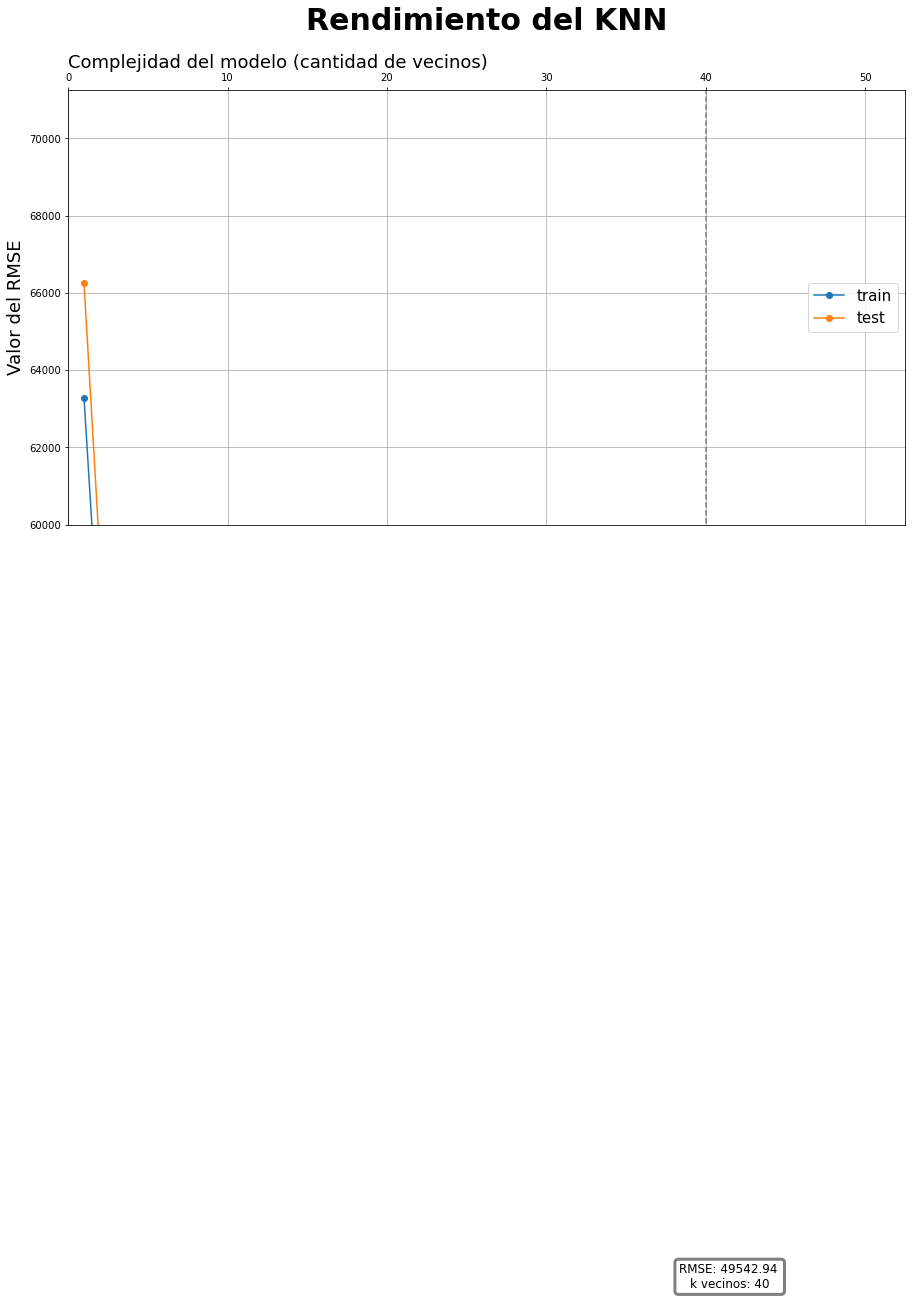

In [40]:
ind_k_vecinos_optimo = lista_rmse_test_knn.index(min(lista_rmse_test_knn))
k_vecinos_optimo = k_vecinos[ind_k_vecinos_optimo]
rmse_knn_test = lista_rmse_test_knn[ind_k_vecinos_optimo]
rmse_knn_train = lista_rmse_train_knn[ind_k_vecinos_optimo]
fig, ax = plt.subplots(figsize = (15,8))


ax.xaxis.set_ticks_position('top')
    
ax.text(0, 1.05, 'Complejidad del modelo (cantidad de vecinos)', transform=ax.transAxes, size=18)
plt.title('Rendimiento del KNN', size = 30, weight=600, pad = 60, loc = 'center')


plt.plot(k_vecinos, lista_rmse_train_knn,'o-',label='train' )
plt.plot(k_vecinos, lista_rmse_test_knn,'o-',label='test')
plt.vlines(k_vecinos_optimo, 
           ymin = rmse_knn_test, 
           ymax = max(lista_rmse_test_knn) + 5000,
           linestyles = 'dashed', 
           colors = 'grey')
plt.hlines(rmse_knn_test, 
           xmin = 0, 
           xmax = k_vecinos_optimo, 
           linestyles = 'dashed',
           colors = 'grey')

bbox_props1 = dict(boxstyle="round,pad=0.3", fc="white", ec="black", alpha = 0.5, lw=3)
rmse = round(rmse_knn_test,2)
plt.text(k_vecinos_optimo + 1.5, 
         lista_rmse_test_knn[ind_k_vecinos_optimo]-9000, 
         "RMSE: {} \nk vecinos: {}".format(rmse, k_vecinos_optimo), 
         ha="center", va="center", 
         size=12, 
         bbox=bbox_props1)

plt.legend(fontsize = 15, loc = 'center right')
#plt.xlabel('Complejidad del modelo [nro de vecinos]', size = 20)
plt.ylabel('Valor del RMSE', size = 18)
plt.ylim(60000,max(lista_rmse_test_knn) + 5000)
plt.xlim(0)
plt.tight_layout()
plt.grid()
plt.show()

### Creo un modelo de Arboles de decision y Vecinos mas cercanos con los hiperparametros ajustados

In [41]:
tree_regressor_optimo = DecisionTreeRegressor(max_depth=22, random_state=42)
knn_regressor_optimo = KNeighborsRegressor(n_neighbors=40)

In [44]:
# Entreno el modelo arboles de decision con hiperparametros ajustados
tree_regressor_optimo.fit(X_train, y_train)

# Predecimos sobre nuestro set
y_train_pred_tree_optimo = tree_regressor_optimo.predict(X_train)
y_test_pred_tree_optimo = tree_regressor_optimo.predict(X_test)

# Buscamos RMSE y R2
rmse_tree_train_optimo = np.sqrt(mean_squared_error(y_train, y_train_pred_tree_optimo))
rmse_tree_test_optimo = np.sqrt(mean_squared_error(y_test, y_test_pred_tree_optimo))
r2_tree_train_optimo = r2_score(y_train, y_train_pred_tree_optimo)
r2_tree_test_optimo = r2_score(y_test, y_test_pred_tree_optimo)

# Imprimo los resultados
print('Modelo: Arboles de decision con hiperparametros ajustados')
print(f'Raíz del error cuadrático medio en Train con hiperparametros ajustados: {rmse_tree_train_optimo}')
print(f'Raíz del error cuadrático medio en Test con hiperparametros ajustados: {rmse_tree_test_optimo}')
print(f'R2 en Train con hiperparametros ajustados: {r2_tree_train_optimo}')
print(f'R2 en Test con hiperparametros ajustados: {r2_tree_test_optimo}')

Modelo: Arboles de decision con hiperparametros ajustados
Raíz del error cuadrático medio en Train con hiperparametros ajustados: 46148.47142234489
Raíz del error cuadrático medio en Test con hiperparametros ajustados: 48994.94593491912
R2 en Train con hiperparametros ajustados: 0.6853924706087744
R2 en Test con hiperparametros ajustados: 0.6480629129146467


In [45]:
# Entreno el modelo vecinos mas cercanos con hiperparametros ajustados
knn_regressor_optimo.fit(X_train, y_train)

# Predecimos sobre nuestro set
y_train_pred_knn_optimo = knn_regressor_optimo.predict(X_train)
y_test_pred_knn_optimo = knn_regressor_optimo.predict(X_test)

# Buscamos RMSE y R2
rmse_knn_train_optimo = np.sqrt(mean_squared_error(y_train, y_train_pred_knn_optimo))
rmse_knn_test_optimo = np.sqrt(mean_squared_error(y_test, y_test_pred_knn_optimo))
r2_knn_train_optimo = r2_score(y_train, y_train_pred_knn_optimo)
r2_knn_test_optimo = r2_score(y_test, y_test_pred_knn_optimo)

# Imprimo los resultados
print('Modelo: Vecinos mas cercanos con hiperparametros ajustados')
print(f'Raíz del error cuadrático medio Train con hiperparametros ajustados: {rmse_knn_train_optimo}')
print(f'Raíz del error cuadrático medio Test con hiperparametros ajustados: {rmse_knn_test_optimo}')
print(f'R2 en Train con hiperparametros ajustados: {r2_knn_train_optimo}')
print(f'R2 en Test con hiperparametros ajustados: {r2_knn_test_optimo}')

Modelo: Vecinos mas cercanos con hiperparametros ajustados
Raíz del error cuadrático medio Train con hiperparametros ajustados: 51550.64067757418
Raíz del error cuadrático medio Test con hiperparametros ajustados: 53789.35272799573
R2 en Train con hiperparametros ajustados: 0.6074250305448525
R2 en Test con hiperparametros ajustados: 0.5758151961808056


Entre los modelos analizados, ya con los hiperparametros ajustados, el que mejor metricas presenta es el arbol de decisión: tiene un RMSE mas bajo que el resto y el R2 es mayor. A pesar de tener el RMSE menor a los otros dos modelos analizados, el error da USD 97.063.- que sigue siendo muy alto en relacion al valor medio del precio que ronda los USD 263.000.- 
Para poder predecir correctamente el precio de las propiedades creo que es necesario utilizar variables que aca no estamos teniendo en cuenta, tales como el tipo de propiedad y principalmente el barrio donde se encuentra esa propiedad, por lo que podemos decir que el analisis hecho hasta aqui esta incompleto y no muestra una prediccion sumamente eficaz. 